In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import export_graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

#On importe les donnes
B = pd.read_csv('donnees_test.csv', delimiter= ',',header=0)

#On stock la variable a expliquer
#varexpliquee = B['assur_caravane']

#On transforme le df en matrice de valeurs
X_new = B[B.columns[:-1]].values


#On affiche les arbres pour chaque variable si pas de feuille, on elimine (donc - de 20 individus pour une branche non regroupable)
from sklearn.tree import DecisionTreeClassifier
#from sklearn.tree import export_graphviz
#from sklearn import tree

#Pour les arbres sous jupiter version 6.0.1 non disponible sur ordi Polyetch

#for i in range(1,78):
#    arbre_cla_nivetu=DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
#    arbre_cla_nivetu.fit(X_new[:,i].reshape(X_new.shape[0],1),varexpliquqee)
    #nom="nivetu_"+B.columns[i]+".dot"
    #export_graphviz(arbre_cla_nivetu,out_file=nom,class_names="nivetu",rounded=True,filled=True)
#    fig = plt.figure(figsize=[10,10])
#    fig.suptitle(B.columns[i])
#    tree.plot_tree(arbre_cla_nivetu) 


In [2]:
#Les variables suivants ne possèdent pas de feuilles sur les arbres de décision
#nb_plache_voile et mt_planche_voile
#nb_camion et mt_camion

del B['nb_planche_voile']
del B['nb_camion']
del B['mt_planche_voile']
del B['mt_camion']

#On enleve aussi la cle inutile
#del B['cle']

C:\Users\tewoz\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


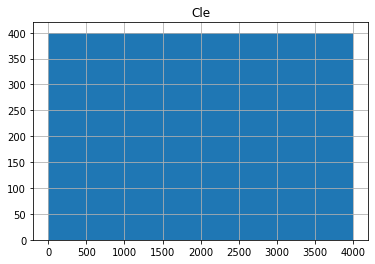

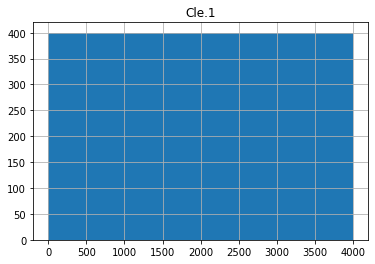

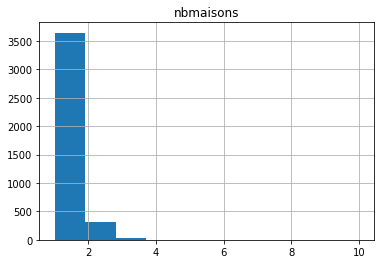

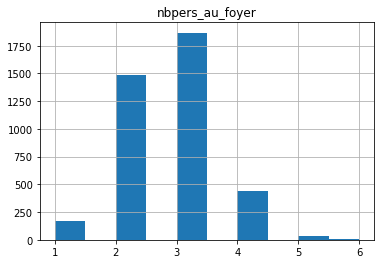

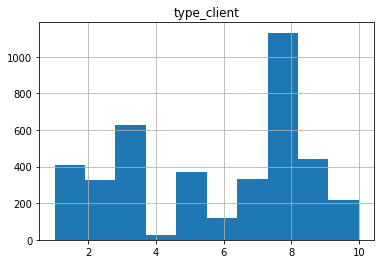

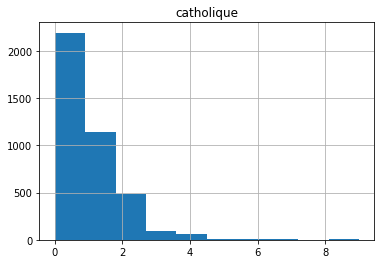

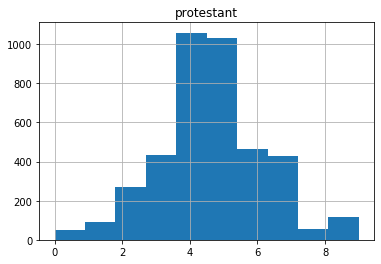

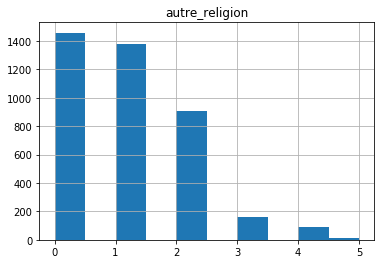

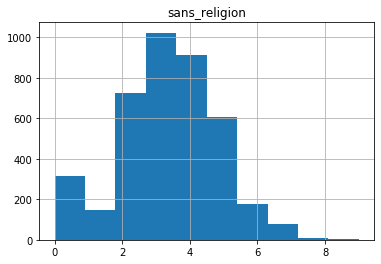

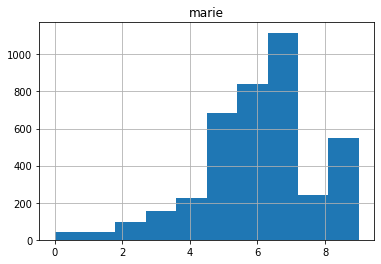

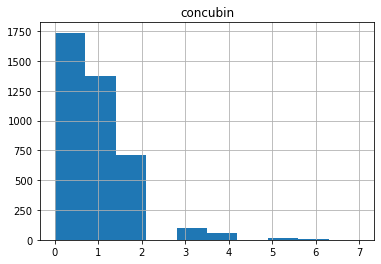

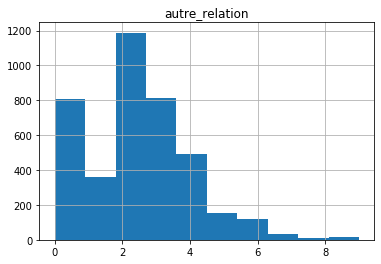

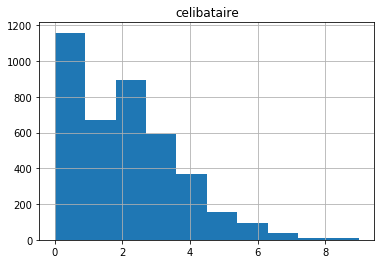

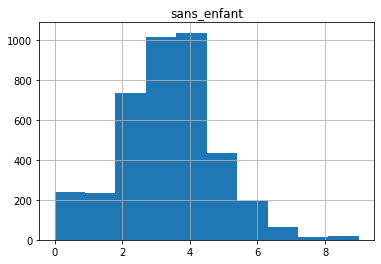

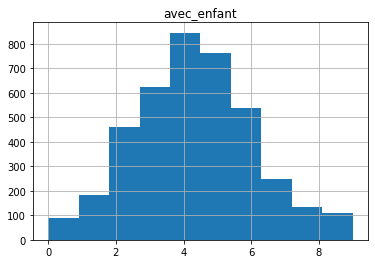

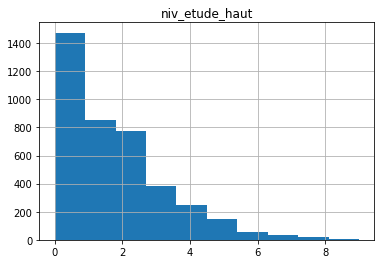

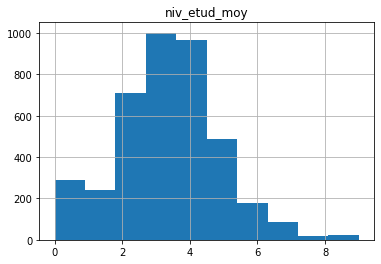

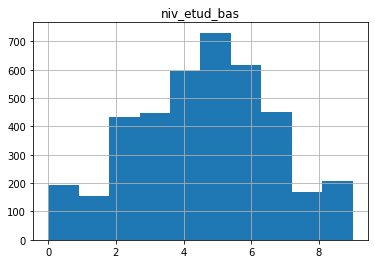

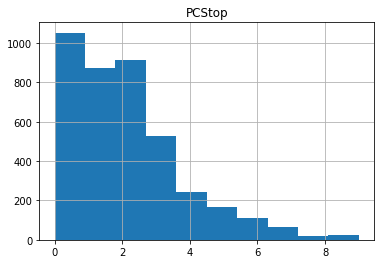

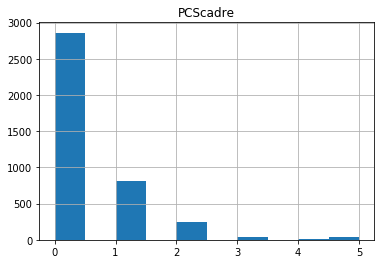

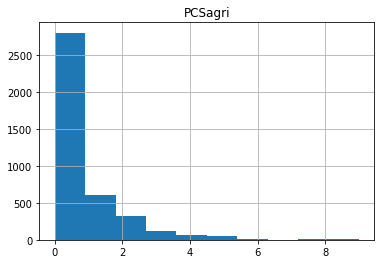

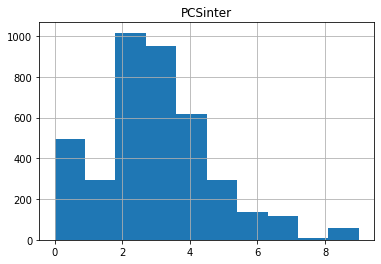

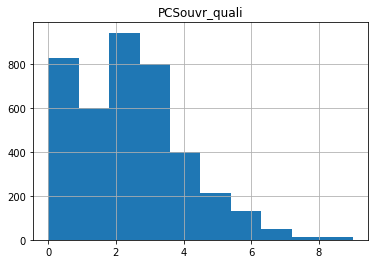

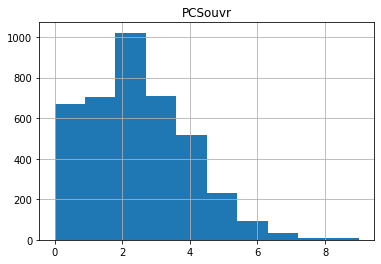

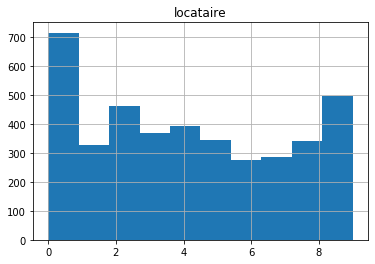

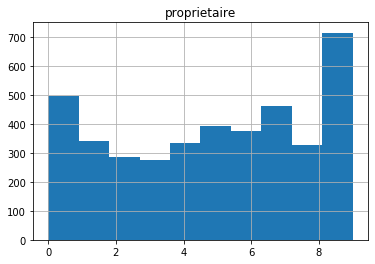

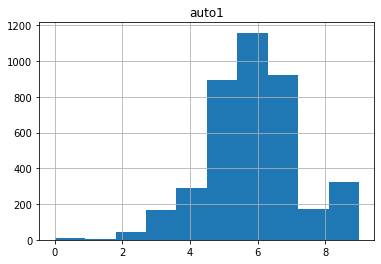

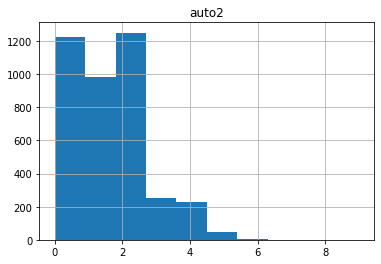

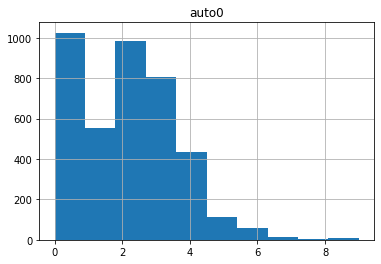

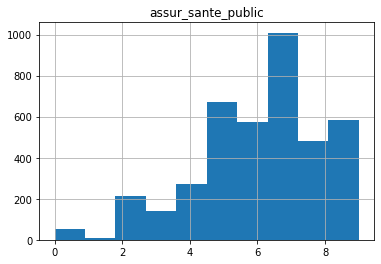

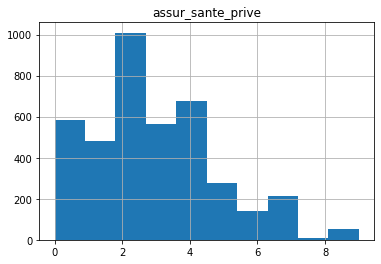

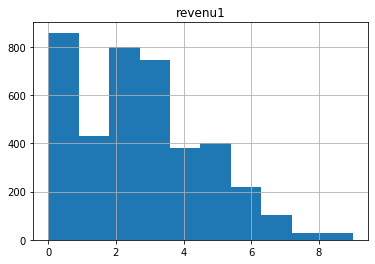

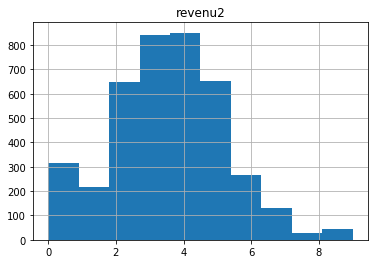

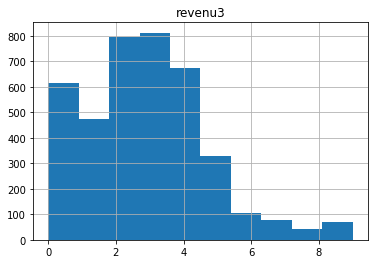

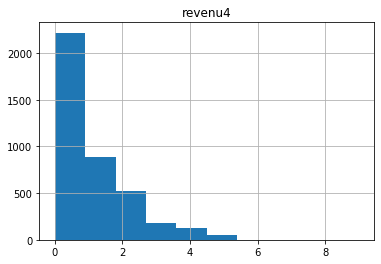

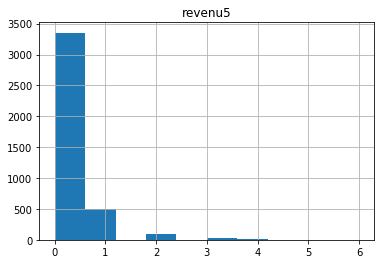

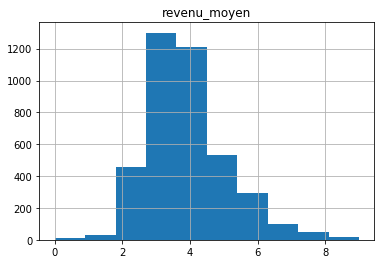

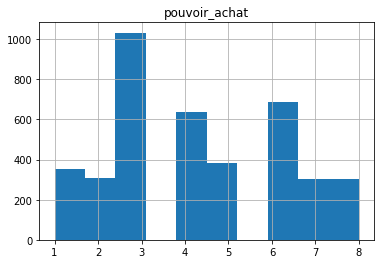

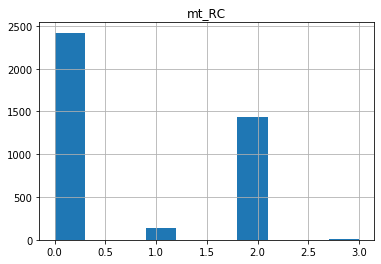

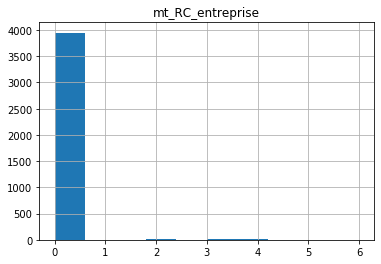

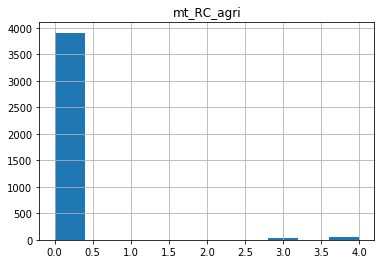

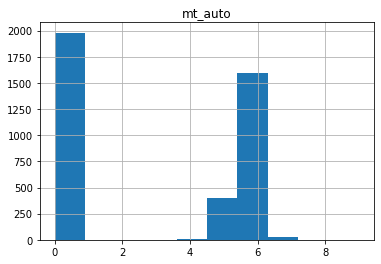

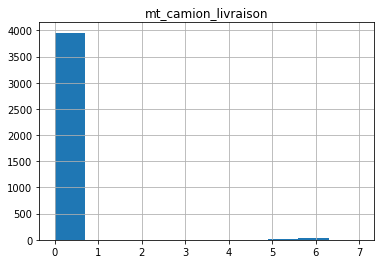

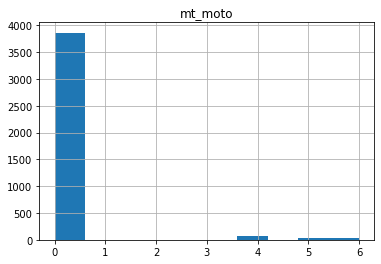

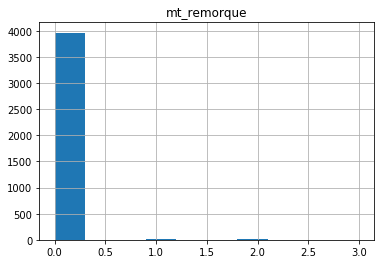

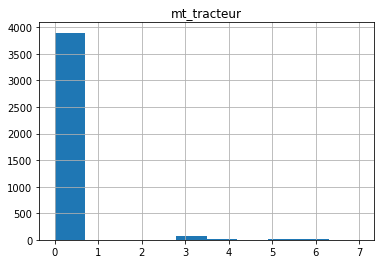

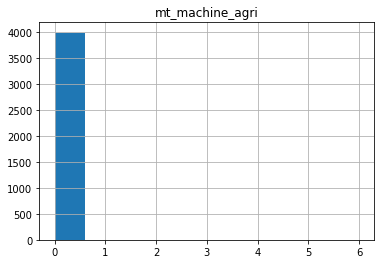

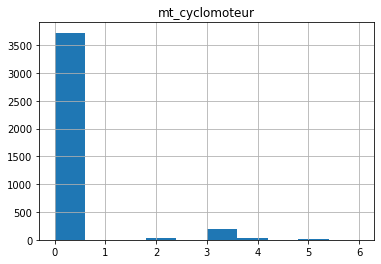

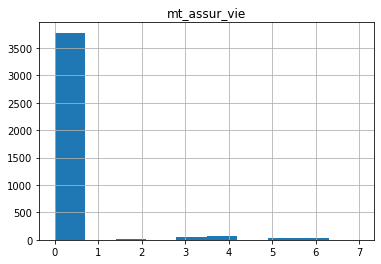

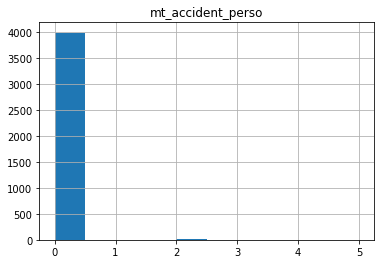

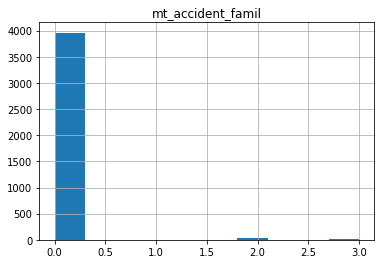

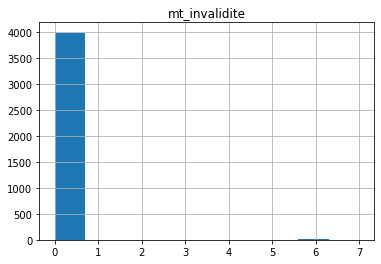

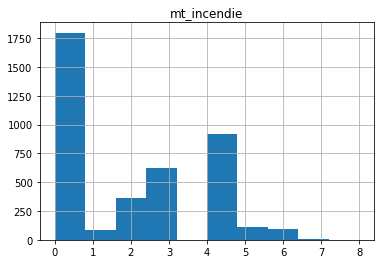

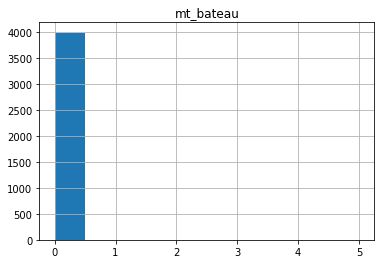

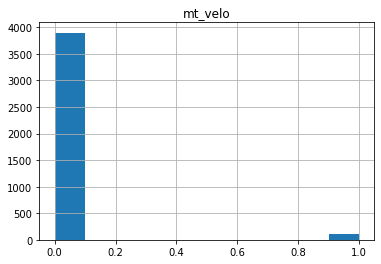

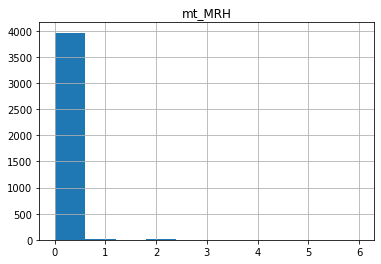

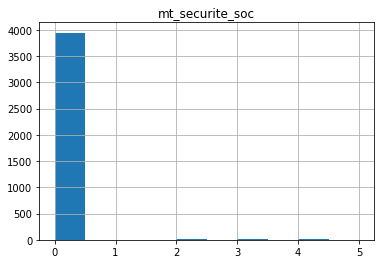

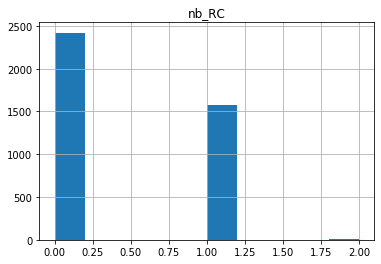

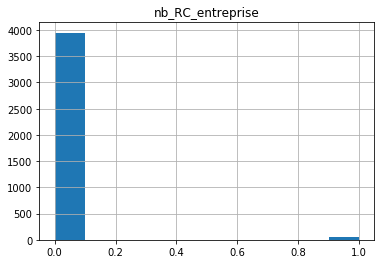

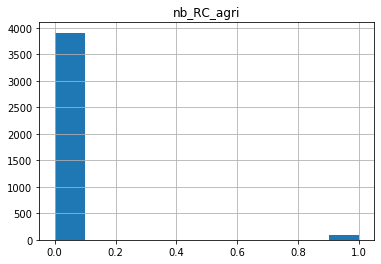

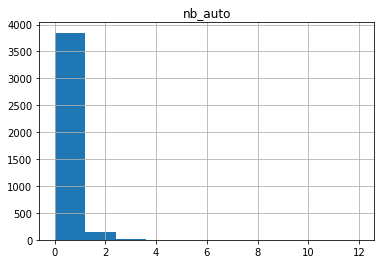

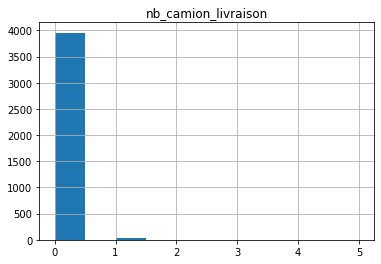

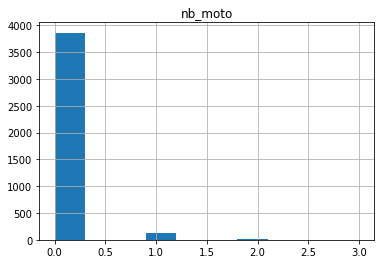

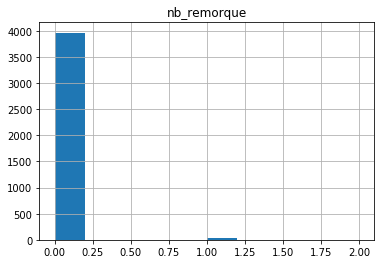

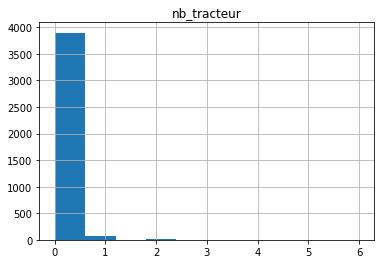

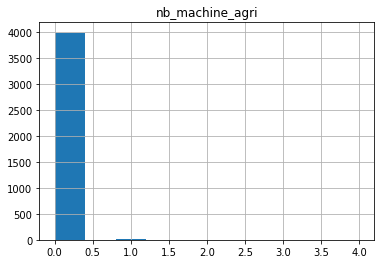

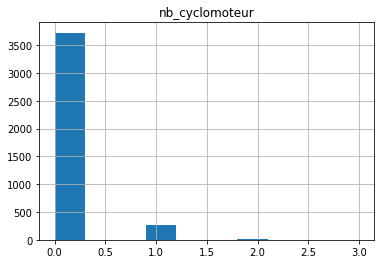

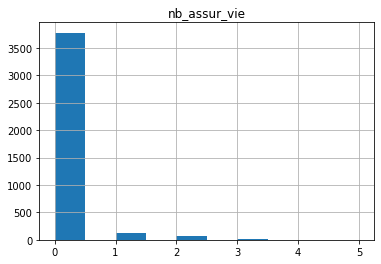

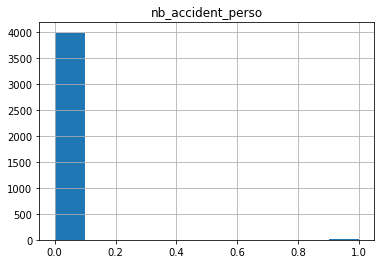

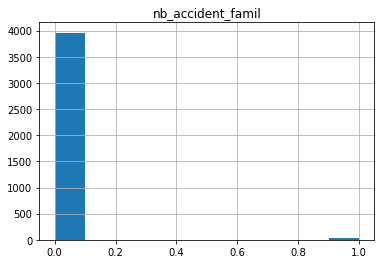

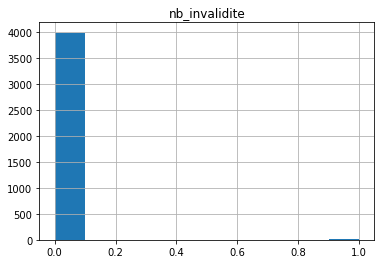

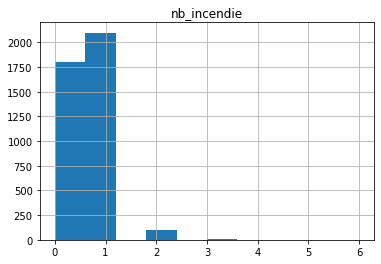

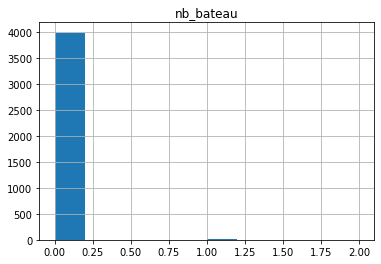

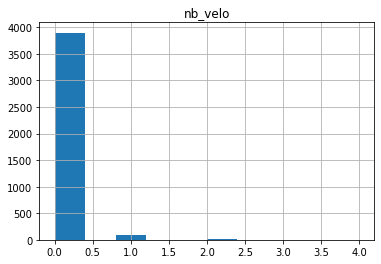

In [3]:
for i in range(0,74):
    B.hist(B.columns[i]) 
    
#Après analyse des histogrammes on enlève les variables suivantes :
#mt_RC_entreprise
#mt_RC_agri
#mt_camion_livraison
#mt_machine_agri
#mt_accident_perso
#mt_accident_famil
#mt_invalidite
#mt_planche_voile
#mt_MRH
#mt_securite_soc
#nb_camion_livraison
#nb_machine_agri
#nb_accident_perso
#nb_assur_vie
B.columns[:-1]
del B['mt_RC_entreprise']
del B['mt_RC_agri']
del B['mt_camion_livraison']
del B['mt_machine_agri']
del B['mt_accident_perso']
del B['mt_accident_famil']
del B['mt_invalidite']
del B['mt_MRH']
del B['mt_securite_soc']
del B['nb_camion_livraison']
del B['nb_machine_agri']
del B['nb_accident_perso']
del B['nb_assur_vie']

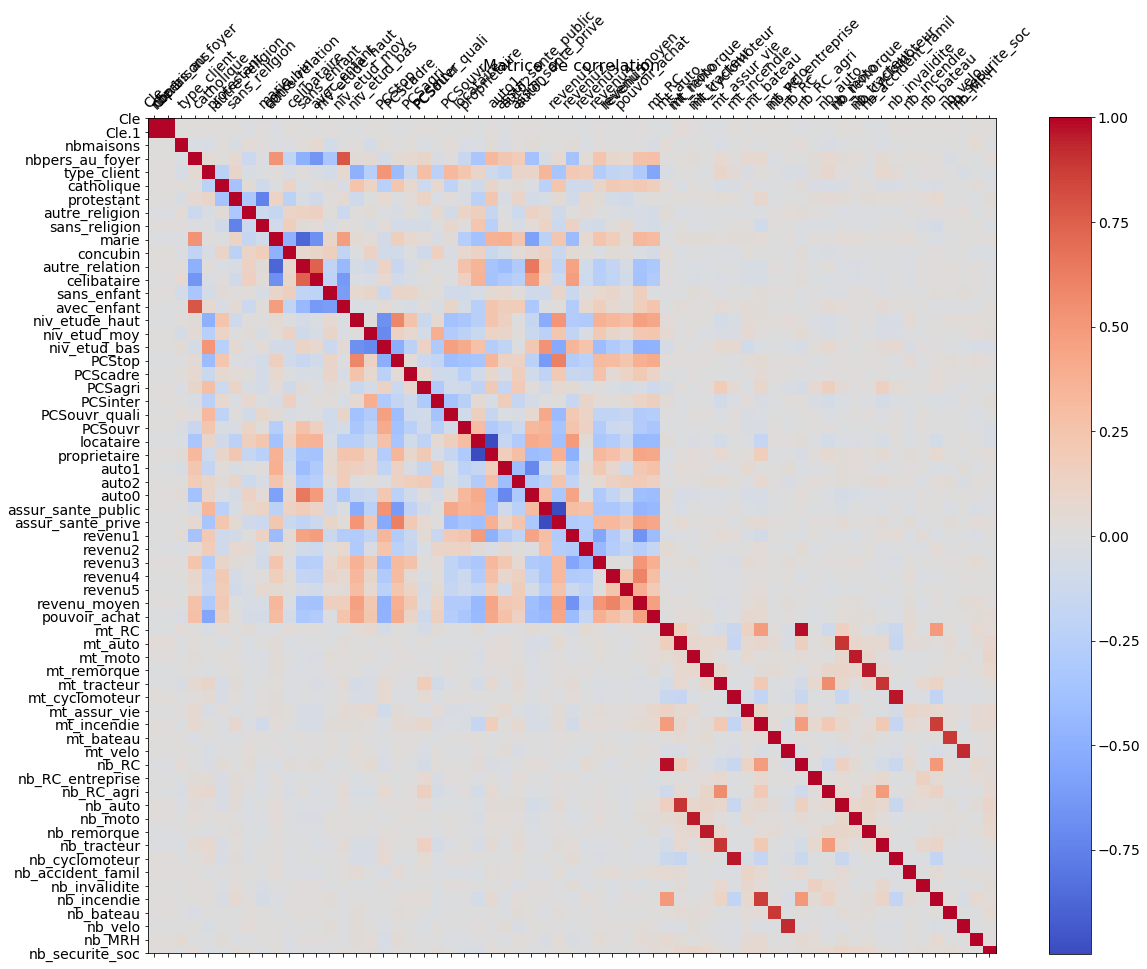

In [4]:
#On affiche les correlaitons sous forme de carte de chaleur pour voir ou se situe approximativement les fortes correlations
f = plt.figure(figsize=(19, 15))
plt.matshow(B.corr(), fignum=f.number, cmap = 'coolwarm')
plt.xticks(range(B.shape[1]), B.columns, fontsize=14, rotation=45)
plt.yticks(range(B.shape[1]), B.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Matrice de correlation', fontsize=16);

In [5]:
#Pareil que precedent mais afficahge different
rs = np.random.RandomState(0)
df2 = pd.DataFrame(rs.rand(42, 42))
corr2 = B.corr()
corr2.style.background_gradient(cmap='coolwarm')




In [6]:
#Avec les corrélations on décide de retirer les variables suivantes :(>0.74)
#protestant et sans_religion  
#avec_enfant et nbpers_au_foyer
#marie et autre_relation
#autre_relation et célibataire
#niv_etu_moy et niv_etu_bas
#locataire et proprietaire
#assur_sante_public et assur_sante_prive
#mt_RC et nb_RC
#mt_auto et nb_auto
#mt_moto et nb_moto
#mt_remorque et nb_remorque
#mt_tracteur et nb_tracteur
#mt_cyclomoteur et nb_cyclomoteur
#mt_incendie et nb_incendie
#mt_velo et nb_velo

del B['protestant']
del B['avec_enfant']
del B['marie']
del B['autre_relation']
del B['niv_etud_moy']
del B['locataire']
del B['assur_sante_public']
del B['nb_RC']
del B['nb_auto']
del B['nb_moto']
del B['nb_remorque']
del B['nb_tracteur']
del B['nb_cyclomoteur']
del B['nb_incendie']
del B['nb_velo']


(4000, 48)
Index(['Cle', 'Cle.1', 'nbmaisons', 'nbpers_au_foyer', 'type_client',
       'catholique', 'autre_religion', 'sans_religion', 'concubin',
       'celibataire', 'sans_enfant', 'niv_etude_haut', 'niv_etud_bas',
       'PCStop', 'PCScadre', 'PCSagri', 'PCSinter', 'PCSouvr_quali', 'PCSouvr',
       'proprietaire', 'auto1', 'auto2', 'auto0', 'assur_sante_prive',
       'revenu1', 'revenu2', 'revenu3', 'revenu4', 'revenu5', 'revenu_moyen',
       'pouvoir_achat', 'mt_RC', 'mt_auto', 'mt_moto', 'mt_remorque',
       'mt_tracteur', 'mt_cyclomoteur', 'mt_assur_vie', 'mt_incendie',
       'mt_bateau', 'mt_velo', 'nb_RC_entreprise', 'nb_RC_agri',
       'nb_accident_famil', 'nb_invalidite', 'nb_bateau', 'nb_MRH',
       'nb_securite_soc'],
      dtype='object')
mt_moto              9.626310e-03
mt_auto              6.817498e-03
mt_remorque          5.354172e-03
mt_assur_vie         5.227289e-03
mt_incendie          3.973228e-03
nb_RC_agri           3.207720e-03
nb_bateau            2.9

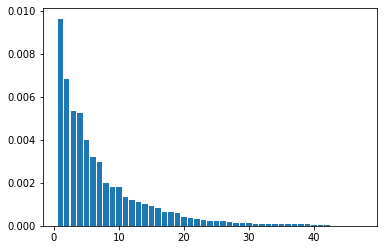

In [7]:
print(B.shape)
print(B.columns)

def rapport_corr(cible,data):
    #moyenne par variable
    m=data.mean()
    #SCT : variabilité totale = nbre d'ind*variance
    SCT=data.shape[0]*data.var(ddof=0)
    #DataFrame conditionnellement aux groupes
    Xb=data.groupby(cible)
    #effectifs conditionnels
    nk=Xb.size()
    #moyennes conditionnelles dans chaque groupe
    mk=Xb.mean()
    #pour chaque groupe écart à la moyenne par variable
    EMk=(mk-m)**2
    #pondéré par les effectifs du groupe
    EM=EMk.multiply(nk,axis=0)
    #somme des valeurs=>BSS
    SCE=np.sum(EM,axis=0)
    #carré du rapport de corrélation
    R2=SCE/SCT
    #trie selon les valeurs décroissantes (ce qui nous intéresse ce sont les valeurs le splus proches de 1)
    R2trie=R2.sort_values(ascending=False)
    print(R2trie)
    print(R2trie.index)
    #réalisation d'un graphique pour la définition d'une zone de coupure
    plt.bar(range(1,R2trie.shape[0]+1),height=R2trie)
    return R2trie
cible = B[B.columns[-1]].values



a = rapport_corr(cible, B[B.columns[:-1]])

In [8]:
X_new1 = B[a.index[0:10]] #10 premières variables
#X_new1['assur_caravane'] = varexpliquee
print(X_new1.shape)
X_new2 = B[a.index[0:20]] #20 premières variables
#X_new2['assur_caravane'] = varexpliquee
print(X_new2.shape)
X_new3 = B[a.index[0:30]] #30 premières variables
#X_new3['assur_caravane'] = varexpliquee
print(X_new3.shape)
X_new4 = B[a.index] #Toutes les variables
#X_new4['assur_caravane'] = varexpliquee
print(X_new4.shape)
X_new1.to_csv('10var.csv',index=True)
X_new2.to_csv('20var.csv',index=True)
X_new3.to_csv('30var_bis.csv',index=True)
X_new4.to_csv('46var.csv',index=True)

(4000, 10)
(4000, 20)
(4000, 30)
(4000, 47)


In [9]:
#
#
#
#
#
#
#
#
#
#
#
#
#
#
# PROGRAMME TERMINE